In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

C:\Users\alext\miniconda3\envs\steam-sale-tracker\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Import Data
game_info = pd.read_parquet("../data/game_info.parquet")
game_tags = pd.read_parquet("../data/game_tags.parquet")
game_history = pd.read_parquet("../data/game_history.parquet")

# Data Preview

## Game Info

In [4]:
game_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               8353 non-null   object        
 1   itad_uuid           8353 non-null   object        
 2   type                7998 non-null   category      
 3   achievements        8353 non-null   bool          
 4   mature              8353 non-null   bool          
 5   release_date        8044 non-null   datetime64[ns]
 6   rank                8353 non-null   int32         
 7   collected           8353 non-null   int32         
 8   steam_score         8353 non-null   int32         
 9   steam_review_count  8353 non-null   int32         
 10  has_release_date    8353 non-null   bool          
 11  review_tier         8353 non-null   category      
 12  early_access        8353 non-null   bool          
 13  peak_player_count   8353 non-null   int64       

In [5]:
game_info.describe()

,release_date,rank,collected,steam_score,steam_review_count,peak_player_count
count,8044,8353.000000,8353.000000,8353.000000,8.353000e+03,8.353000e+03
mean,2019-07-15 05:05:24.017901568,32000.880402,2480.426434,68.998923,5.226747e+03,2.879086e+03
min,1987-01-01 00:00:00,3.000000,0.000000,0.000000,1.000000e+00,0.000000e+00
25%,2016-10-25 00:00:00,11811.000000,130.000000,52.000000,6.600000e+01,9.000000e+00
50%,2020-01-29 12:00:00,27233.000000,883.000000,71.000000,1.580000e+02,4.300000e+01
75%,2023-04-10 06:00:00,48621.000000,2133.000000,89.000000,7.140000e+02,3.080000e+02
max,2025-12-31 00:00:00,84132.000000,80099.000000,100.000000,2.568074e+06,1.384608e+06
std,NaN,23690.873905,5524.259816,21.846998,4.934657e+04,2.942457e+04


In [6]:
game_info.steam_score.unique()

array([ 29,  51,  25,  26,  16,  27,  18,  34,  21,   0,  33,  19,  39,
         9,  20,  10,  13,  23,  22,  17,  50, 100,  24,  35,   5,  31,
        36,  15,  12,  30,   3,  14,  11,  80,   7,   2,  48,  47,  57,
        49,  58,  53,  43,  46,  40,  64,  44,  55,  38,  76,  41,  59,
        52,  68,  45,  56,  37,  60,  42,  67,  86,  85,  54,  63,  72,
        83,  70,  73,  69,  74,  65,  93,  75,  77,  32,  66,  79,  71,
        88,  62,  28,  89,  84,  90,  61,  94,  81,  91,  78,  82,  87,
        96,  92,  95,  97,  98,  99])

<Axes: >

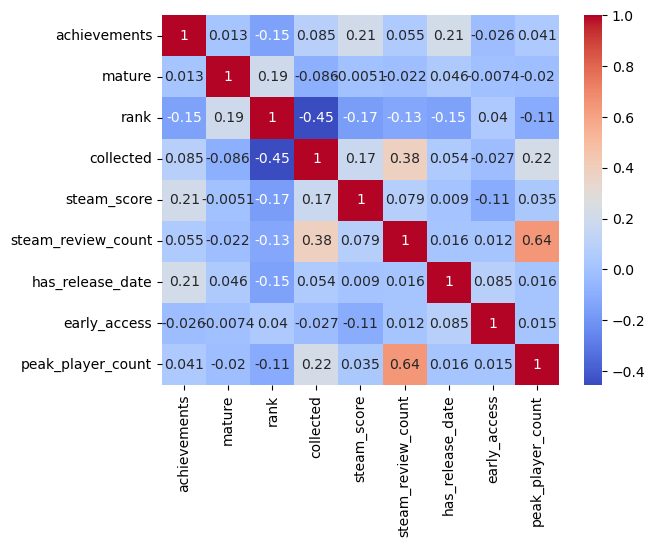

In [7]:
sns.heatmap(game_info.corr(numeric_only=True), annot=True, cmap="coolwarm")

Slightly highter correlation between `steam_review_count` and `collected`. This makes sense since people that actually own a game would be leaving reviews. you cant leave a review without owning the game. 

`collected` and `rank` is inversly correlated. This also makes sense since more people are likely to have a game of it is ranked better (closer to 1) as opposed to a worse rank (farther from 1)



<Axes: xlabel='steam_score', ylabel='Count'>

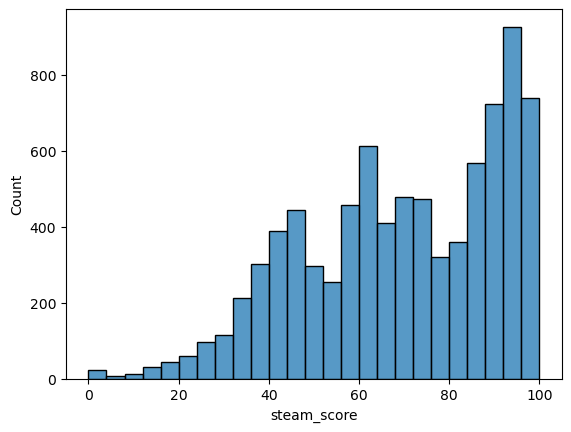

In [8]:
sns.histplot(game_info, x="steam_score", bins=25)

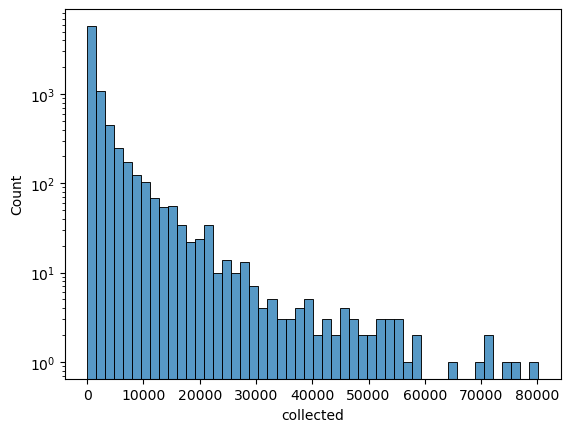

In [9]:
sns.histplot(game_info['collected'], bins=50)
plt.yscale('log')
plt.show()

## Is there a way to make mature games more successful?


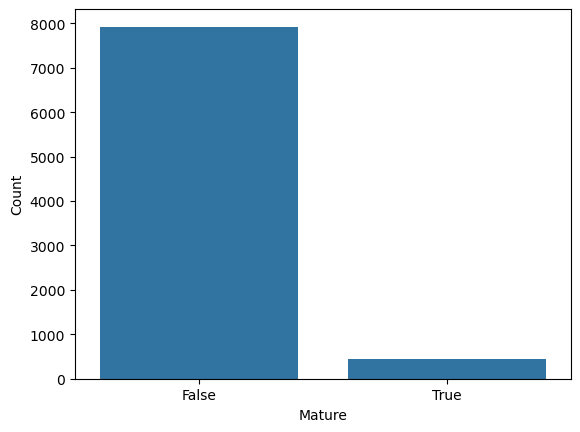

In [14]:
ax = sns.countplot(x="mature", data=game_info, order=[False, True])
ax.set_xlabel("Mature")
ax.set_ylabel("Count")
plt.show()

Data for Mature is skewed. There aren't as many `mature(NSFW)` games as `non-mature` games to begin with. In our entire dataset of 8357 rows, only 435 of them are `mature` (`5.2%`)

### Review Tier

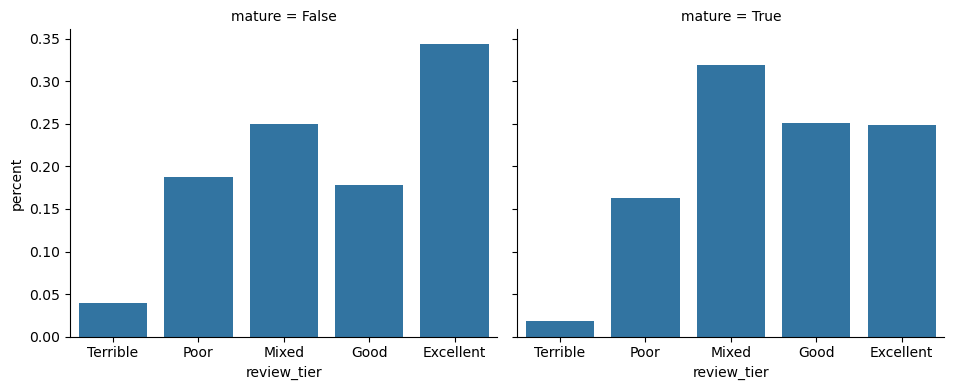

In [133]:
# ax = sns.countplot(x="review_tier", 
#                    data=game_info, 
#                    order=["Terrible", "Poor", "Mixed", "Good", "Excellent"])
# ax.set_xlabel("Review Tier")
# ax.set_ylabel("Count")
# plt.show()

plot_data = (
    pd.crosstab(game_info["mature"], game_info["review_tier"], normalize="index")
    .stack()
    .rename("percent")
    .reset_index()
)

sns.catplot(
    x="review_tier",
    y="percent",
    data=plot_data,
    kind="bar",
    col="mature",
    order=["Terrible", "Poor", "Mixed", "Good", "Excellent"],
    height=4,
    aspect=1.2
);


In [52]:
table = pd.crosstable(game_info['mature'], game_info['review_tier'])
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-squared: ", chi2)
print("p-value: ", p)

Chi-squared:  36.9112266785902
p-value:  1.8787711953642405e-07


Given the chi-squared table, mature has nothing to do with the skewed data. So we can see that, percent-wise, mature games are less likely to be scored in the Excellent tier

Data Distribution:
- Excellent: 85–100
- Good: 70–84
- Mixed: 50–69
- Poor: 30–49
- Terrible: 1–29

This data is also a bit skewed. Probably mainly because I did not perfectly get a even distribution of data. Another reason is because steam reviews aren't centered on a true 50/50 "average". Reviewers are self-selected, as in they choose to buy/play, and people tend to avoid the harshest option. Titles that qualify as very negative/terrible are uncommon, so our sample contains much fewer of them. In other words, it's harder to get a bad tier, both because of human rating behavior and becausae fiew games sustain that level of negative feedback.

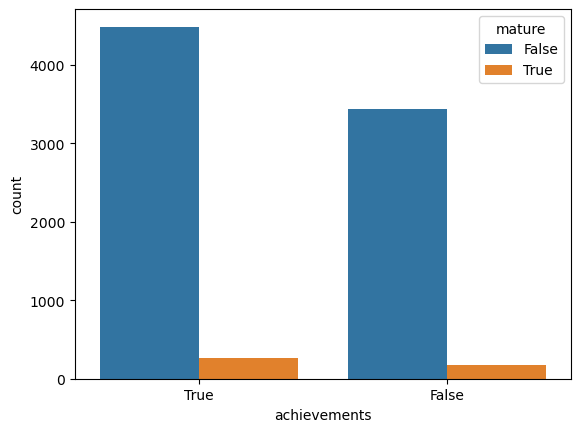

In [103]:
ax = sns.countplot(data=game_info, x='achievements', order=[True, False], hue='mature')

looks like achievements do not matter for mature games

## Does the month release matter?

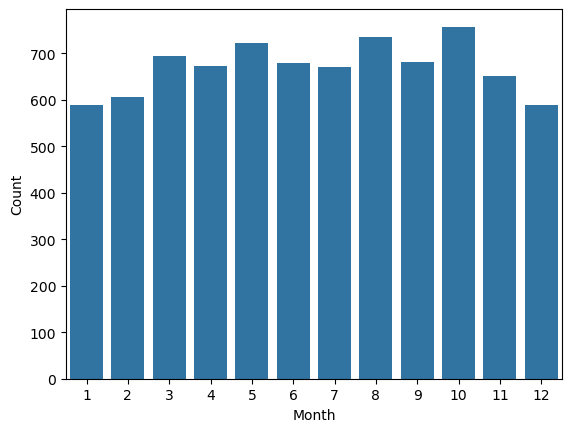

In [10]:
month_extract = game_info.query("has_release_date == True").copy()
month_extract['month'] = month_extract['release_date'].dt.month

ax = sns.countplot(x="month", data=month_extract)
ax.set_xlabel("Month")
ax.set_ylabel("Count")
plt.show()

The distribution of game releases per month are pretty much the same

<Axes: xlabel='month', ylabel='Proportion'>

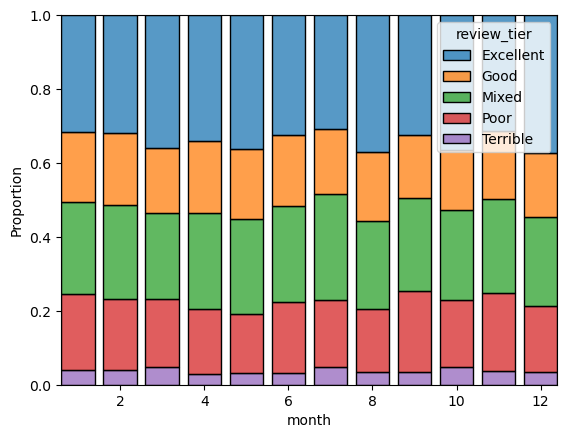

In [130]:
sns.histplot(
    data=month_extract,
    x='month', hue='review_tier',
    multiple='fill', stat='proportion',
    discrete=True, shrink=.8
)

### Steam review count

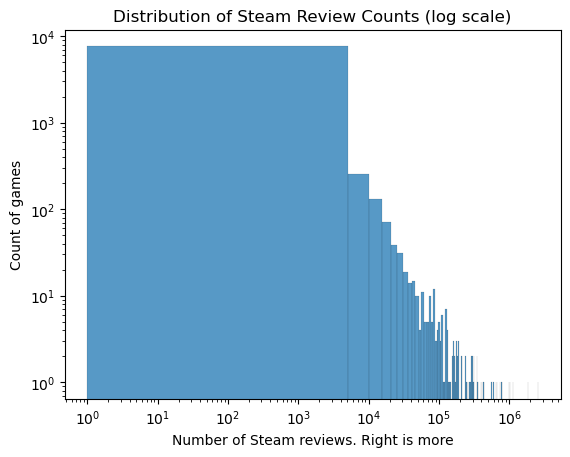

In [303]:
sns.histplot(game_info['steam_review_count'], bins=500)
plt.yscale('log')   # log scale on y-axis
plt.xscale('log')   # log scale on x-axis (optional)

plt.title("Distribution of Steam Review Counts (log scale)")
plt.xlabel("Number of Steam reviews. Right is more")
plt.ylabel("Count of games")

plt.show()

We see that there are a lot of games have less than 1000 reviews

### Early Access

<Axes: xlabel='review_tier', ylabel='count'>

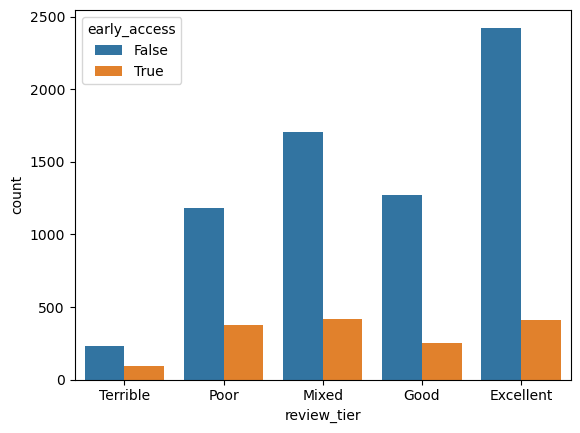

In [628]:
sns.countplot(game_info, x='review_tier', order=["Terrible", "Poor", "Mixed", "Good", "Excellent"], hue='early_access')

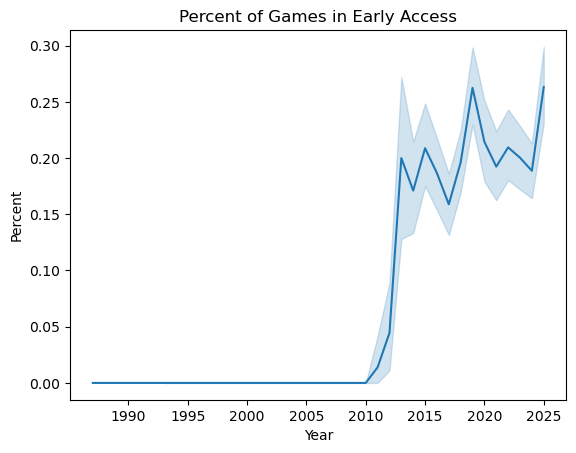

In [12]:
year_extract = game_info.query("has_release_date == True").copy()
year_extract['year'] = year_extract['release_date'].dt.year
year_extract['month'] = year_extract['release_date'].dt.month

sns.lineplot(year_extract[['early_access', 'year']], x='year', y='early_access')
plt.ylabel("Percent")
plt.xlabel("Year")
plt.title("Percent of Games in Early Access")
plt.show()

### Has the month release changed over the years?

<Axes: xlabel='month', ylabel='count'>

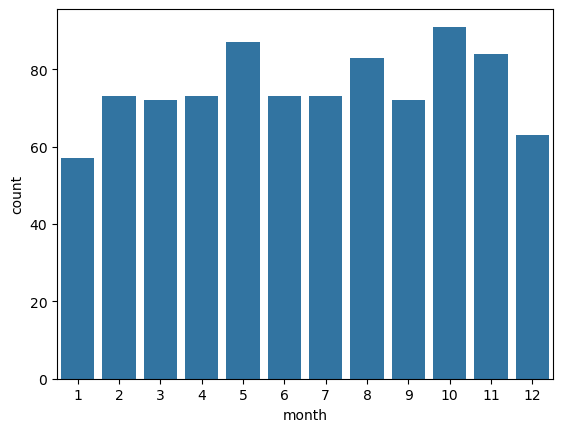

In [32]:
sns.countplot(year_extract.query("year == 2024"), x='month')

## Game Tags

In [193]:
game_tags.describe()

,itad_uuid,title,tag
count,40571,40571,40571
unique,8353,8357,424
top,018d937e-f046-71c3-8bca-f9ee16f9fb99,Kerbal Space Program 2,Indie
freq,10,5,2600


In [40]:
game_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40571 entries, 0 to 40570
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   itad_uuid  40571 non-null  object
 1   title      40571 non-null  object
 2   tag        40571 non-null  object
dtypes: object(3)
memory usage: 951.0+ KB


In [218]:
game_tags.tag.unique()

array(['Space', 'Sandbox', 'Exploration', 'Building', 'Physics',
       'Free to Play', 'Card Battler', 'Trading Card Game',
       'Deckbuilding', 'PvP', 'Automobile Sim', 'Simulation', 'Driving',
       'Realistic', 'Casual', 'Racing', 'Indie', 'Sports', 'Adventure',
       'MMORPG', 'Nature', 'First-Person', 'Action', 'Horror',
       'City Builder', 'Strategy', 'RTS', 'Cold War', 'FPS',
       'Hack and Slash', 'RPG', 'Arcade', 'Co-op', 'Platformer',
       'Massively Multiplayer', 'Retro', 'Puzzle', 'Stealth', 'Heist',
       'Immersive Sim', 'Action-Adventure', 'Shooter', 'Sci-fi',
       'Singleplayer', 'Top-Down Shooter', 'Early Access',
       'Psychological Horror', 'Third-Person Shooter', 'Fighting', 'Loot',
       'Souls-like', 'Dark', 'Nudity', 'Hentai', 'Anime',
       'Sexual Content', 'On-Rails Shooter', 'Flight', 'Escape Room',
       'Online Co-Op', 'Atmospheric', 'Card Game', 'Visual Novel',
       'Zombies', 'Local Co-Op', 'Management', 'Character Customization',
  

### Top tags

In [260]:
def create_top_N(dataframe, col, N):
    s = dataframe[col].value_counts()
    out = s.iloc[:N]
    # out.loc['Other'] = s.iloc[N:].sum()
    df = out.reset_index()
    df.columns=['tag', 'count']
    return df

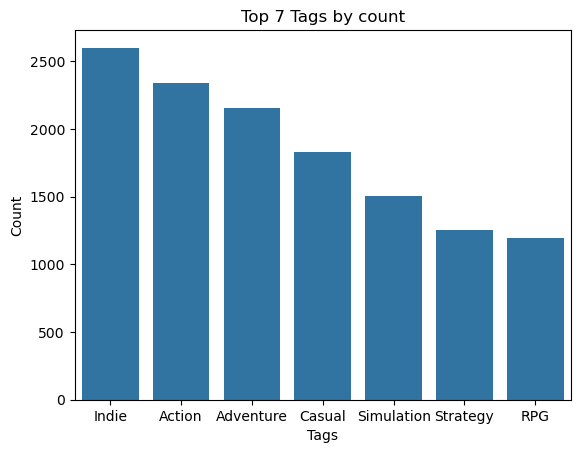

In [261]:
N = 7
df = create_top_N(game_tags, 'tag', N)

sns.barplot(df, x='tag', y='count')
plt.title(f"Top {N} Tags by count")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.show();

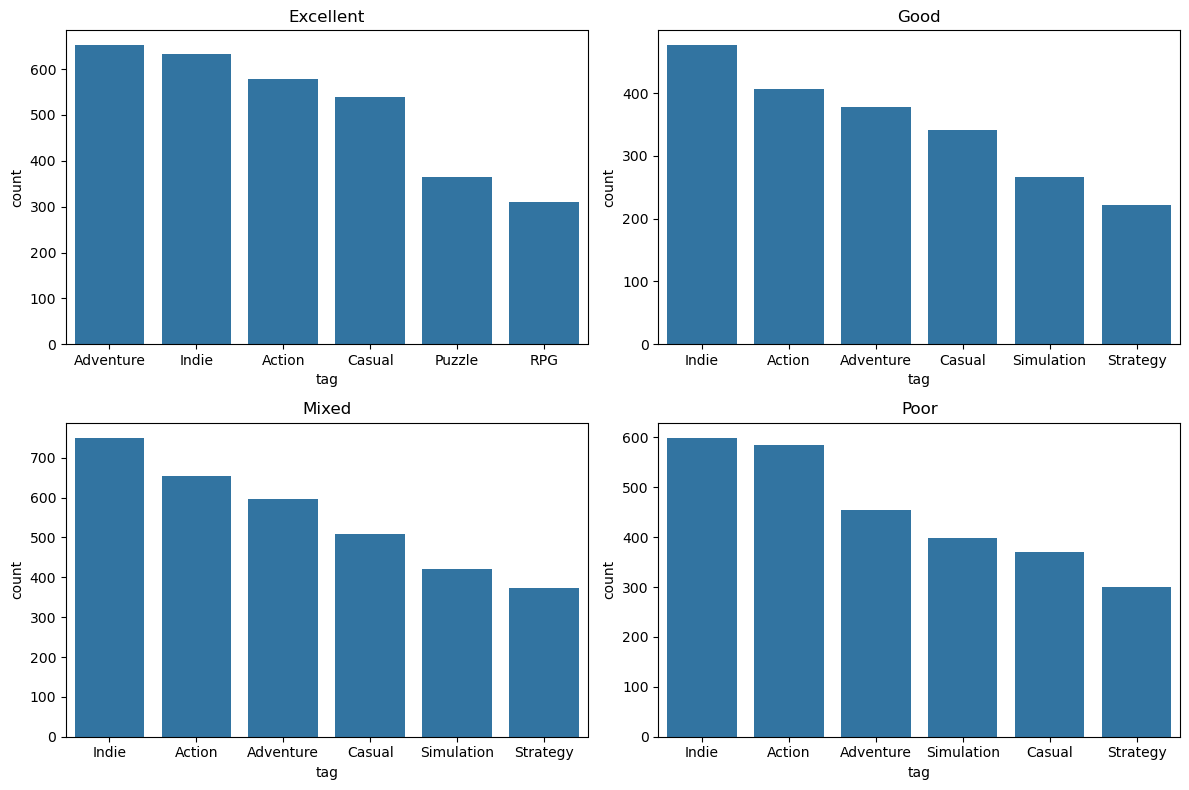

In [294]:
tags_with_tier = game_tags.merge(
    game_info[['itad_uuid', 'review_tier']],
    on='itad_uuid',
    how='left'
)
# tags_with_excellent = tags_with_tier.query("review_tier == 'Excellent'")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
N=6

df_excellent = create_top_N(tags_with_tier.query("review_tier == 'Excellent'"), "tag", N)
df_good = create_top_N(tags_with_tier.query("review_tier == 'Good'"), "tag", N)
df_mixed = create_top_N(tags_with_tier.query("review_tier == 'Mixed'"), "tag", N)
df_poor = create_top_N(tags_with_tier.query("review_tier == 'Poor'"), "tag", N)

sns.barplot(df_excellent, x='tag', y='count', ax=axes[0,0])
axes[0,0].set_title("Excellent")
sns.barplot(df_good, x='tag', y='count', ax=axes[0,1])
axes[0,1].set_title("Good")
sns.barplot(df_mixed, x='tag', y='count', ax=axes[1,0])
axes[1,0].set_title("Mixed")
sns.barplot(df_poor, x='tag', y='count', ax=axes[1,1])
axes[1,1].set_title("Poor")

plt.tight_layout()
plt.show();

`Indie`, `Action`, `Adventure`, `Casual` are in all 4 graphs, the rest of the vary but they are generally around the same place

We leave out the `Terrible` tier because there just isn't games in this tier

## Game History

In [33]:
game_history.describe()

,deal_price,regular_price,percent
count,462978.000000,462978.000000,462978.000000
mean,8.432707,11.857661,28.915905
std,9.234786,10.587730,32.962413
min,0.000000,0.000000,0.000000
25%,1.990000,4.990000,0.000000
50%,4.990000,9.990000,0.000000
75%,10.990000,14.990000,60.000000
max,69.989998,69.989998,100.000000


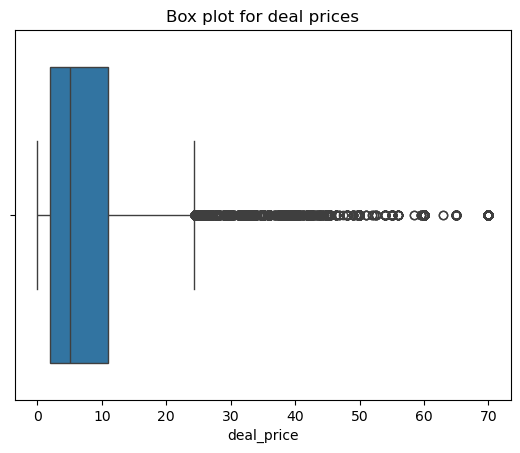

In [34]:
sns.boxplot(x=game_history['deal_price'])
plt.title("Box plot for deal prices")
plt.show();

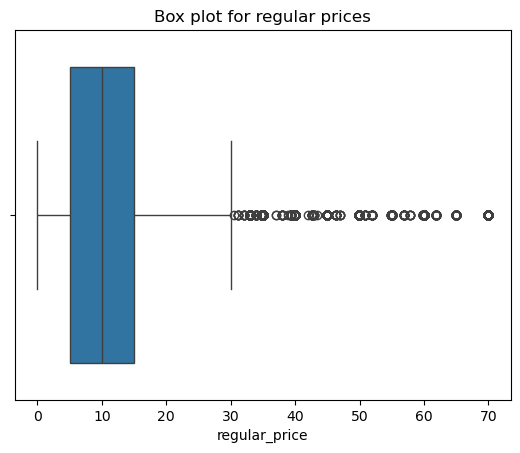

In [35]:
sns.boxplot(x=game_history['regular_price'])
plt.title("Box plot for regular prices")
plt.show();

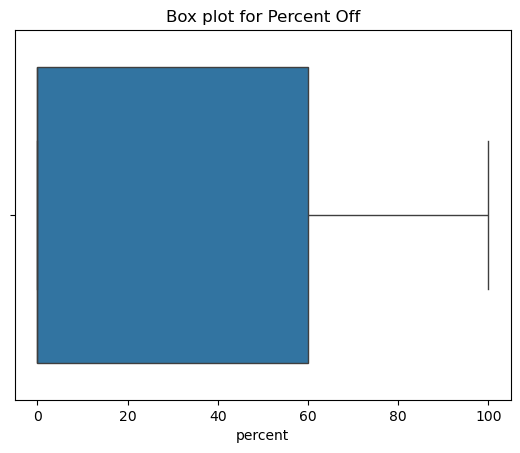

In [36]:
sns.boxplot(x=game_history['percent'])
plt.title("Box plot for Percent Off")
plt.show();

In [37]:
game_history.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462978 entries, 0 to 463398
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   itad_uuid      462978 non-null  object             
 1   timestamp      462978 non-null  datetime64[ns, UTC]
 2   deal_price     462978 non-null  float32            
 3   regular_price  462978 non-null  float32            
 4   percent        462978 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(2), object(1), uint8(1)
memory usage: 14.6+ MB


In [38]:
game_history.describe()

,deal_price,regular_price,percent
count,462978.000000,462978.000000,462978.000000
mean,8.432707,11.857661,28.915905
std,9.234786,10.587730,32.962413
min,0.000000,0.000000,0.000000
25%,1.990000,4.990000,0.000000
50%,4.990000,9.990000,0.000000
75%,10.990000,14.990000,60.000000
max,69.989998,69.989998,100.000000


In [39]:
game_history.query('percent == 120')

,itad_uuid,timestamp,deal_price,regular_price,percent


In [40]:
game_history.percent.unique()

array([  0,  40,  20,  50,  60,  55,  70,  65,  85,  33,  25,  30,  10,
        90,  75,  86,  80,  15,  67,  76,  35,  66,  24,  51,  83,  46,
        45,  37,  38,  62,  88,  72,  87,  68,  29,  14,  23,  77,  82,
        69,  74,  44,  71,  95,  89,  79,  78,  34,  48,  36,  49,  81,
        84,  64,  39,  43,  57,  91,  58, 100,   8,  54,  92,  97,  47,
        17,  31,  99,  52,  73,  61,  21,  27,  26,  56,  53,  22,   4,
         5,  16,   1,   7,  28,  32,  42,  41,  63,  13,  12,  94,  11,
        18,  59,  19,   2,   6,  96,   3,   9,  98,  93], dtype=uint8)

In [41]:
game_history = game_history[game_history['percent'] <= 100]

In [42]:
game_history.query('deal_price > 70')

,itad_uuid,timestamp,deal_price,regular_price,percent


In [354]:
# game_history = game_history[game_history['deal_price'] < 70]
# game_history = game_history[game_history['regular_price'] < 70]

In [355]:
# game_history.to_parquet('../data/game_history.parquet')

In [356]:
# game_history = pd.read_parquet("../data/game_history.parquet")

In [43]:
sale_occurances = game_history.query("percent > 0")

In [44]:
sale_occurances.percent.unique()

array([ 40,  20,  50,  60,  55,  70,  65,  85,  33,  25,  30,  10,  90,
        75,  86,  80,  15,  67,  76,  35,  66,  24,  51,  83,  46,  45,
        37,  38,  62,  88,  72,  87,  68,  29,  14,  23,  77,  82,  69,
        74,  44,  71,  95,  89,  79,  78,  34,  48,  36,  49,  81,  84,
        64,  39,  43,  57,  91,  58, 100,   8,  54,  92,  97,  47,  17,
        31,  99,  52,  73,  61,  21,  27,  26,  56,  53,  22,   4,   5,
        16,   1,   7,  28,  32,  42,  41,  63,  13,  12,  94,  11,  18,
        59,  19,   2,   6,  96,   3,   9,  98,  93], dtype=uint8)

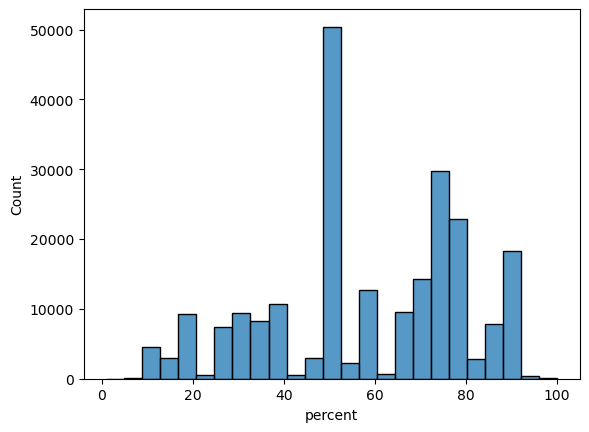

In [45]:
sns.histplot(data=sale_occurances, x='percent', bins=25);

There are a lot of games that are put on sale at 50% off. but the majority of games are 50 and above. games usually do not go on sale below 50. BUT this could mean that some games could be put on sale multiple times. We are tracking events here

In [46]:
min_discounts = (
    game_history.query("percent > 0")
    .groupby('itad_uuid')['percent']
    .min()
)
max_discounts = (
    game_history.query("percent > 0")
    .groupby('itad_uuid')['percent']
    .max()
)

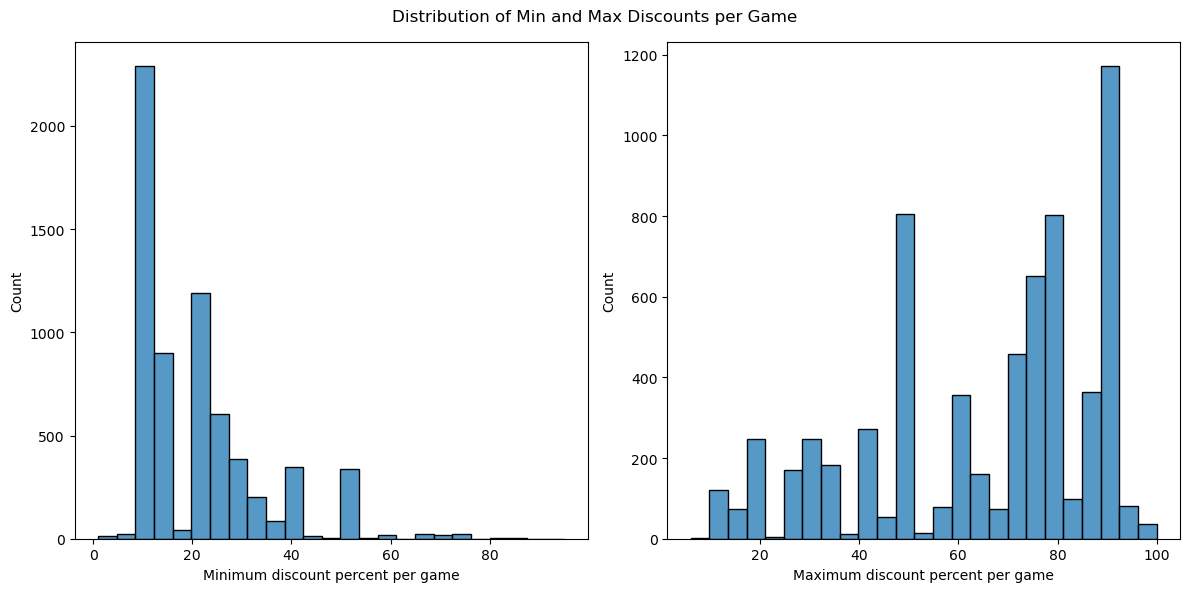

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(min_discounts, bins=25, ax=axes[0])
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Minimum discount percent per game")
sns.histplot(max_discounts, bins=25, ax=axes[1])
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Maximum discount percent per game")

fig.suptitle("Distribution of Min and Max Discounts per Game")
plt.tight_layout()
plt.show()

Games typically start with small discounts (10-30%). Over time, most games eventually reach larger discounts, often around 80-90%. This suggests that discounts follow a lifecycle: small cuts at first, then larger reductions later.

### Month that games are put on sale

C:\Users\alext\AppData\Local\Temp\ipykernel_6716\1612103052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_occurances['sale_month'] = sale_occurances['timestamp'].dt.month


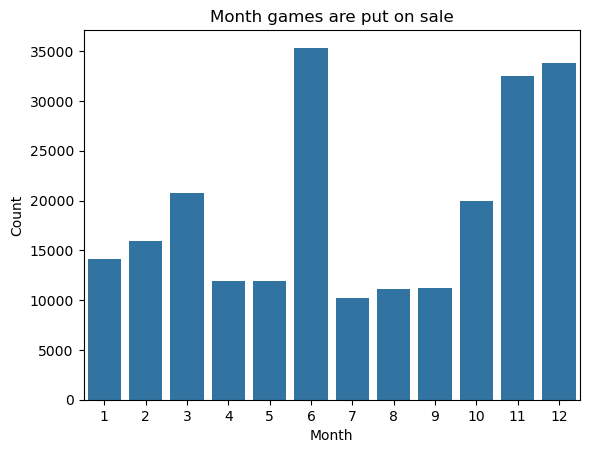

In [48]:
sale_occurances['sale_month'] = sale_occurances['timestamp'].dt.month
sns.countplot(data=sale_occurances, x='sale_month')
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Month games are put on sale")
plt.show();

Games are put on sale mainly around `June`, `November`, and `December`. This makes sense because `June` would be the beginning of Summer and `November`/`December` would be a holiday sale.

Not able to explain the slight spikes in `March` and `October` though

### Finding the average time it takes for when a game first goes on sale

In [49]:
first_discount = (
    game_history.query("percent > 0")
    .groupby("itad_uuid")["timestamp"]
    .min()
)

In [77]:
first_discount_merged = pd.merge(first_discount,
                                 game_info[["itad_uuid", "release_date","has_release_date","steam_score","review_tier","peak_player_count"]],
                                 on="itad_uuid", 
                                 how="left")

In [78]:
first_discount_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   itad_uuid          6535 non-null   object             
 1   timestamp          6535 non-null   datetime64[ns, UTC]
 2   release_date       6302 non-null   datetime64[ns]     
 3   has_release_date   6480 non-null   object             
 4   steam_score        6480 non-null   float64            
 5   review_tier        6480 non-null   category           
 6   peak_player_count  6480 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(2)
memory usage: 313.0+ KB


In [79]:
first_discount_notnull = first_discount_merged.query("has_release_date == True").copy()
first_discount_notnull['timestamp'] = first_discount_notnull['timestamp'].dt.tz_localize(None)

In [80]:
first_discount_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6302 entries, 0 to 6534
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   itad_uuid          6302 non-null   object        
 1   timestamp          6302 non-null   datetime64[ns]
 2   release_date       6302 non-null   datetime64[ns]
 3   has_release_date   6302 non-null   object        
 4   steam_score        6302 non-null   float64       
 5   review_tier        6302 non-null   category      
 6   peak_player_count  6302 non-null   float64       
dtypes: category(1), datetime64[ns](2), float64(2), object(2)
memory usage: 351.0+ KB


In [81]:
first_discount_notnull['first_sale_days'] = (first_discount_notnull['timestamp']- first_discount_notnull['release_date']).dt.total_seconds()/86400

In [82]:
first_discount_notnull['first_sale_days'] = first_discount_notnull['first_sale_days'].astype('float64')

In [83]:
first_discount_notnull.query("first_sale_days < 0 ")

,itad_uuid,timestamp,release_date,has_release_date,steam_score,review_tier,peak_player_count,first_sale_days
14,018d937e-e9c7-7383-948e-7b73b0541acb,2016-12-23 00:45:40,2021-11-01,True,89.0,Excellent,6.0,-1773.968287
30,018d937e-e9e1-727e-b14e-450ffd40165f,2012-10-16 17:03:07,2019-08-30,True,96.0,Excellent,107.0,-2508.289502
36,018d937e-e9e6-7060-9895-152b5ad55a6a,2016-08-24 10:45:28,2016-10-10,True,43.0,Poor,19.0,-46.551759
45,018d937e-e9f3-736d-b2b8-02f0e5850ede,2013-11-27 18:21:59,2015-04-02,True,85.0,Excellent,1175.0,-490.234734
62,018d937e-ea04-70ff-ba76-70273de6e582,2018-09-27 17:29:50,2019-07-10,True,23.0,Terrible,8.0,-285.270949
...,...,...,...,...,...,...,...,...
6492,01968657-fcbf-7069-b8b7-50c18f808b2d,2024-06-18 09:18:19,2024-12-11,True,85.0,Excellent,257.0,-175.612280
6507,01970d1e-8c3d-73d3-93b8-5b174816b6ca,2025-06-12 22:14:02,2025-06-13,True,100.0,Excellent,22.0,-0.073588
6509,0197198e-5adc-724c-9c3f-680ee10dbc57,2025-07-22 23:45:26,2025-07-23,True,75.0,Good,28.0,-0.010116
6514,01974521-b1ff-7315-8ea0-d5faa8449f69,2025-06-08 19:19:46,2025-07-15,True,45.0,Poor,2829.0,-36.194606


In [98]:
first_discount_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6302 entries, 0 to 6534
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   itad_uuid          6302 non-null   object        
 1   timestamp          6302 non-null   datetime64[ns]
 2   release_date       6302 non-null   datetime64[ns]
 3   has_release_date   6302 non-null   object        
 4   steam_score        6302 non-null   float64       
 5   review_tier        6302 non-null   category      
 6   peak_player_count  6302 non-null   float64       
 7   first_sale_days    6302 non-null   float64       
dtypes: category(1), datetime64[ns](2), float64(3), object(2)
memory usage: 400.2+ KB


In [99]:
first_discount_notnull.describe()

,timestamp,release_date,steam_score,peak_player_count,first_sale_days
count,6302,6302,6302.000000,6.302000e+03,6302.000000
mean,2019-07-02 18:48:03.847984640,2018-12-20 22:45:44.271660032,69.197398,3.074133e+03,193.834949
min,2012-09-04 19:43:12,1987-01-01 00:00:00,0.000000,0.000000e+00,-3814.331042
25%,2016-06-23 19:26:40.500000,2016-05-04 00:00:00,53.000000,9.000000e+00,0.505122
50%,2019-05-09 22:01:11.500000,2019-04-11 00:00:00,71.000000,4.600000e+01,0.906534
75%,2022-11-14 16:55:47.750000128,2022-10-19 00:00:00,89.000000,3.345000e+02,66.775935
max,2025-09-10 14:48:24,2025-09-12 00:00:00,100.000000,1.384608e+06,12171.660324
std,NaN,NaN,21.891722,3.109337e+04,900.658723


In [100]:
pos_first_discount = first_discount_notnull.query("first_sale_days >= 0 ")

In [101]:
pos_first_discount.describe()

,timestamp,release_date,steam_score,peak_player_count,first_sale_days
count,5520,5520,5520.000000,5.520000e+03,5520.000000
mean,2019-08-01 08:25:53.979528960,2018-10-29 20:24:00,69.488587,2.949720e+03,275.501319
min,2012-09-04 19:43:12,1987-01-01 00:00:00,0.000000,0.000000e+00,0.000150
25%,2016-07-29 12:55:19.249999872,2016-03-25 00:00:00,53.000000,8.000000e+00,0.668692
50%,2019-06-25 23:29:22.500000,2019-02-28 00:00:00,72.000000,4.500000e+01,1.279433
75%,2023-01-02 07:19:45.500000,2022-10-14 06:00:00,90.000000,3.192500e+02,84.948889
max,2025-09-10 14:48:24,2025-09-10 00:00:00,100.000000,1.384608e+06,12171.660324
std,NaN,NaN,21.902357,3.213249e+04,913.095491


In [102]:
pos_first_discount.columns

Index(['itad_uuid', 'timestamp', 'release_date', 'has_release_date',
       'steam_score', 'review_tier', 'peak_player_count', 'first_sale_days'],
      dtype='object')

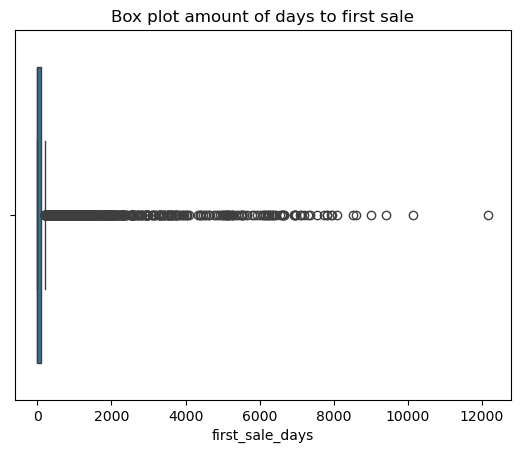

In [103]:
sns.boxplot(x=pos_first_discount['first_sale_days'])
plt.title("Box plot amount of days to first sale")
plt.show();

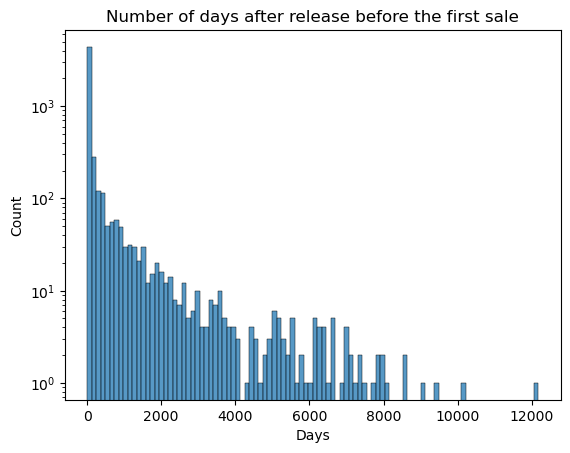

In [104]:
sns.histplot(data=pos_first_discount, x='first_sale_days', bins=100)
plt.yscale("log")
plt.xlabel("Days")
plt.title("Number of days after release before the first sale")
plt.show()

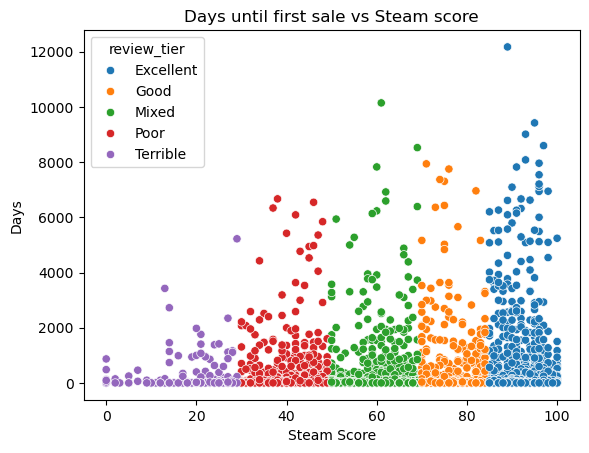

In [90]:
sns.scatterplot(data=pos_first_discount, y='first_sale_days', x="steam_score", hue='review_tier')
plt.title("Days until first sale vs Steam score")
plt.ylabel("Days")
plt.xlabel("Steam Score")
plt.show()

Games that are higher in tier tend to more LATER first sale dates. but still a majority of games 

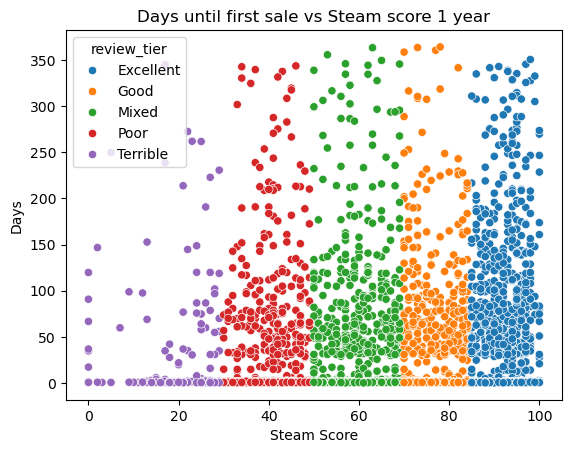

In [105]:
first_discount_clipped = pos_first_discount.query("first_sale_days <=365")
sns.scatterplot(data=first_discount_clipped, y='first_sale_days', x="steam_score", hue='review_tier')
plt.title("Days until first sale vs Steam score 1 year")
plt.ylabel("Days")
plt.xlabel("Steam Score")
plt.show()

In [65]:
first_discount_notnull.to_parquet("../data/days_first_discount.parquet")

In [66]:
neg_first_discount = first_discount_notnull.query("first_sale_days < 0 ")

In [67]:
neg_first_discount['itad_uuid']

14      018d937e-e9c7-7383-948e-7b73b0541acb
30      018d937e-e9e1-727e-b14e-450ffd40165f
36      018d937e-e9e6-7060-9895-152b5ad55a6a
45      018d937e-e9f3-736d-b2b8-02f0e5850ede
62      018d937e-ea04-70ff-ba76-70273de6e582
                        ...                 
6492    01968657-fcbf-7069-b8b7-50c18f808b2d
6507    01970d1e-8c3d-73d3-93b8-5b174816b6ca
6509    0197198e-5adc-724c-9c3f-680ee10dbc57
6514    01974521-b1ff-7315-8ea0-d5faa8449f69
6515    01976707-1269-72c5-a8a4-03b8a02d0263
Name: itad_uuid, Length: 782, dtype: object

In [68]:
game_info[game_info['itad_uuid'].isin(neg_first_discount['itad_uuid'])]

,title,itad_uuid,type,achievements,mature,release_date,rank,collected,steam_score,steam_review_count,has_release_date,review_tier,early_access,peak_player_count
11,Tesla Breaks the World!,018d937e-fdbf-72be-9f1d-6efcde812e2d,game,True,False,2014-11-26,13941,2799,34,23,True,Poor,True,161
12,Prop Hunt,018d937f-4afb-720f-8cea-7980c9625f0d,game,False,False,2021-03-26,67569,106,21,195,True,Terrible,True,24
21,Caffeine,018d937e-f9b2-7041-8bee-10da4b3d5536,game,True,False,2015-10-12,12554,2765,0,5,True,Terrible,True,1
45,Pro Rugby Manager 2015,018d937f-2930-7152-8ae0-241a1c4593ed,game,True,False,2014-09-18,52699,425,19,129,True,Terrible,True,21
58,MotorSport Revolution,018d937f-35cf-700e-88d1-621ac05311c2,game,False,False,2015-01-15,37555,829,5,19,True,Terrible,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,Toy Tactics,018d937f-69ff-733a-9563-def88502ed49,game,True,False,2024-09-19,25177,64,94,108,True,Excellent,True,29
8296,Astral Gunners,018d937f-310b-7159-b159-56a116337641,game,True,False,2024-06-21,61759,35,100,33,True,Excellent,True,7
8301,The Turing Test,018d937f-3118-7175-96d5-e23f680ad5d2,game,True,False,2016-08-25,671,20112,87,6135,True,Excellent,True,277
8306,Rush Rover,018d937f-0bd0-70d4-b891-a7b1dc8c96c9,game,True,False,2017-11-30,34055,175,92,189,True,Excellent,True,7


In [69]:
game_info['early_access'].sum()

1543

In [70]:
game_info.loc[
    game_info["itad_uuid"].isin(neg_first_discount["itad_uuid"]),
    "early_access"
] = True

In [71]:
game_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               8353 non-null   object        
 1   itad_uuid           8353 non-null   object        
 2   type                7998 non-null   category      
 3   achievements        8353 non-null   bool          
 4   mature              8353 non-null   bool          
 5   release_date        8044 non-null   datetime64[ns]
 6   rank                8353 non-null   int32         
 7   collected           8353 non-null   int32         
 8   steam_score         8353 non-null   int32         
 9   steam_review_count  8353 non-null   int32         
 10  has_release_date    8353 non-null   bool          
 11  review_tier         8353 non-null   category      
 12  early_access        8353 non-null   bool          
 13  peak_player_count   8353 non-null   int64       

In [72]:
game_info['early_access'].sum()

1543

In [74]:
# game_info.to_parquet("../data/game_info.parquet")

### Do games that are put on sale early have higher peak player count?

In [109]:
first_discount_clipped.columns

Index(['itad_uuid', 'timestamp', 'release_date', 'has_release_date',
       'steam_score', 'review_tier', 'peak_player_count', 'first_sale_days'],
      dtype='object')

C:\Users\alext\AppData\Local\Temp\ipykernel_6716\3169228062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_discount_clipped["sale_bin"] = pd.cut(first_discount_clipped["first_sale_days"], bins=bins, labels=labels)
C:\Users\alext\AppData\Local\Temp\ipykernel_6716\3169228062.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_counts = first_discount_clipped.query("peak_player_count <=200000").groupby("sale_bin")["peak_player_count"].mean().reset_index()
C:\Users\alext\AppData\Local\Temp\ipykernel_6716\3169228062.py:7: FutureWarning: The default 

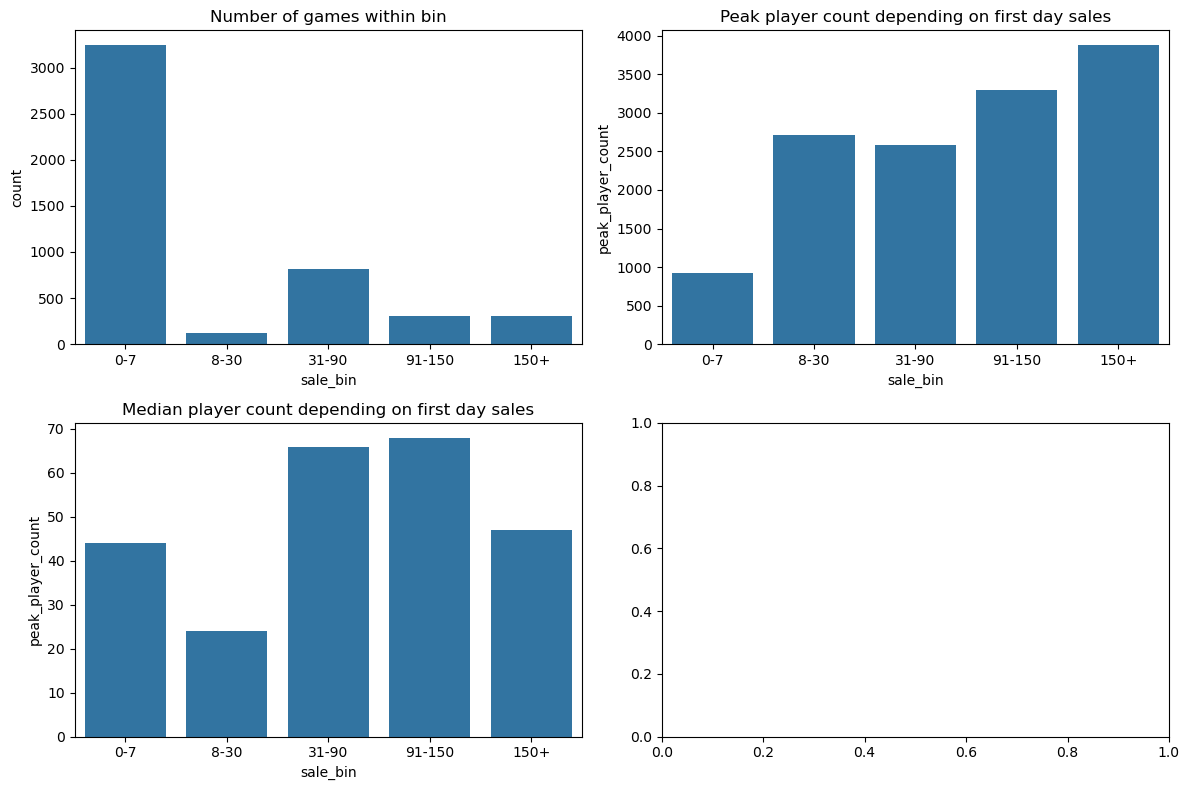

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
bins = [0, 7, 30, 90, 150, 365]
labels = ["0-7", "8-30", "31-90", "91-150", "150+"]
first_discount_clipped["sale_bin"] = pd.cut(first_discount_clipped["first_sale_days"], bins=bins, labels=labels)

avg_counts = first_discount_clipped.query("peak_player_count <=200000").groupby("sale_bin")["peak_player_count"].mean().reset_index()
median = first_discount_clipped.query("peak_player_count <=200000").groupby("sale_bin")["peak_player_count"].median().reset_index()
sns.countplot(first_discount_clipped, x="sale_bin", ax=axes[0,0])
axes[0,0].set_title("Number of games within bin")
sns.barplot(avg_counts, x="sale_bin", y="peak_player_count", ax=axes[0,1])
axes[0,1].set_title("Peak player count depending on first day sales")
sns.barplot(median, x="sale_bin", y="peak_player_count", ax=axes[1,0])
axes[1,0].set_title("Median player count depending on first day sales")
plt.tight_layout()
plt.show()